<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/39_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원과 차원축소
dimension reduction

In [ ]:
# 300 x 100 x 100 ..
# 계속 증가하는 데이터 -> 저장공간의 부족.
# 데이터압축을 해도..  -> 군집이나 분류에 영향을 주지 않는 방법 없을까?

# 바로 '차원축소'!

In [ ]:
# 과일사진은 몇개의 '특성' 이 있나?  → 10000개의 픽셀 → 10000개의 '특성'이 있는 셈
# 머신러닝에서는 이러한 '특성'을 차원 (dimension) 이라고도 부른다.
# 따라서 '차원'을 줄일수 있다면 저장공간도 크게 절약할수 있을것이다.

In [ ]:
#  ※ 다차원배열(2차원, 3차원...)에서 다루어왔던 '차원' 은  축(axis) 를 말하는 거였다.
#     이번 '차원축소' 에서 여기서 말하는 차원은 2차원, 3차원 이런 차원이 아님

In [ ]:
# 차원축소
#  - 대표적인 비지도 학습중 하나
#  - 데이터를 가장 잘 나타내는 '일부 특성' 만 선택
#     -> 데이터 크기 줄이고,
#     -> overfit 억제효과

#  - 줄어든 차원에서 원본차원으로 '최소한의 손실'로 '복원'할수도 있다.
#  - 대표적인 차원축소 알고리즘 => '주성분 분석 (PCA: Principal Component Analysis)'

# 주성분 분석 (PCA) 소개

In [ ]:
#  PCA 는 데이터에 있는 '분산이 큰 방향' 을 찾는 거다.
#  '분산이 큰 방향' 이란 데이터를 '잘 표현하는 어떤 벡터'라고 볼수 있다.

- [교안]
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbUvtbN%2FbtrowkIz2oH%2FpFi7dcwZI0DolbyEpKTHPk%2Fimg.png)


# 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
base_path = r'/content/drive/MyDrive/dataset'

In [ ]:
file_path = os.path.join(base_path, 'fruits_300.npy')
fruits = np.load(file_path)
fruits.shape

(300, 100, 100)

In [ ]:
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

# PCA

In [ ]:
from sklearn.decomposition import PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

```python
class sklearn.decomposition.PCA(
  n_components=None, # 주성분의 개수, 혹은 설명된 분산의 비율
  *,
  copy=True,
  whiten=False,
  svd_solver='auto',
  tol=0.0,
  iterated_power='auto',
  n_oversamples=10,
  power_iteration_normalizer='auto',
  random_state=None)
```


In [ ]:
# n_components=None, # 주성분의 개수, 혹은 설명된 분산의 비율
pca = PCA(n_components=50)
pca.fit(fruits_2d) # 비지도 학습 fit()에 target 값 없다.

PCA(n_components=50)

## components_ 속성
fit() 한 뒤에, PCA 클래스가 찾은 주성분이 저장되어 있다.(array)

In [ ]:
pca.components_.shape

(50, 10000)

In [ ]:
# (50, 10000)
#   n_components=50 으로 지정했기 때문에 첫번째 차원이 50입니다. 즉 50개의 주성분을 찾은거죠.
#   두번째 차원은 항상 원본데이터의 특성 개수와 같은 10000 입니다.

In [ ]:
def draw_fruits(arr, ratio=1):
  n = len(arr)

  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols * ratio, rows * ratio),
                          squeeze=False
                          )

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
      axs[i,j].axis('off')

  plt.show()

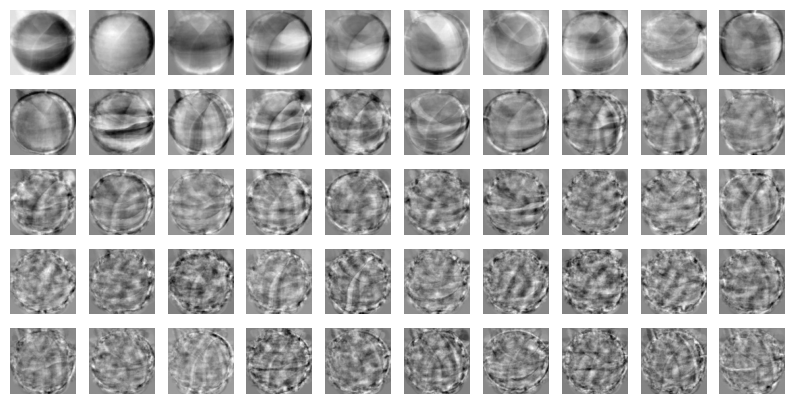

In [ ]:
draw_fruits(pca.components_.reshape(-1,100, 100))

## transform() 주성분으로 분해
원본데이터를 주성분에 투영하여 -> 특성의 개수를 줄일 수 있다

In [ ]:
# 50개의 주성분을 찾았다!
# 그러면, 원본데이터를 주성분에 투영하여 -> 특성의 개수를 10000개에서 50개로 줄일수 있다.
# 마치 원본데이터를 각 주성분으로 '분해'하는 것으로 생각해 볼수 있다.

# PCA 의 transform() 사용

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [ ]:
# fruits_2d 는 (300, 10000) 크기의 배열이었다. 10000개의 픽셀(특성)을 가진 300개의 이미지입니다
# 50개의 주성분을 찾은 PCA 모델을 사용해 이를 (300, 50) 크기의 배열로 변환했습니다.
# 이제 fruits_pca 배열을 50개의 특성을 가진 데이터 입니다  (차원축소!)

# 데이터를 성공적으로 줄였네요!  무려 1/200 으로 줄어들었습니다.
#  fruits_2d 대신 fruits_pca 를 저장한다면 훨씬 공간을 줄일 수 있을것이다.
# 데이터의 차원을 줄였다면, 다시 원상 복구할 수도 있을까요?  이를 알아봅시다

## inverse_transform() 원본데이터 재구성
데이터의 차원을 줄였다면, 다시 원상 복구 할수도 있다 (최소한의 손실로)

In [ ]:
# 특성이 줄었다 -> 어느정도 데이터 손실은 발생.
# 최대한 분산이 큰 방향으로 데이터 투영했기 때문에 -> 원본 데이터의 상당한 부분을 재구성 할수 있다

# PCA 의 inverse_transform() 사용

In [ ]:
print(fruits_pca.shape)

(300, 50)


In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
# 10000 개의 특성이 복원되었다?
# 과연 원본에 가깝게 복원되었나? -> 시각화

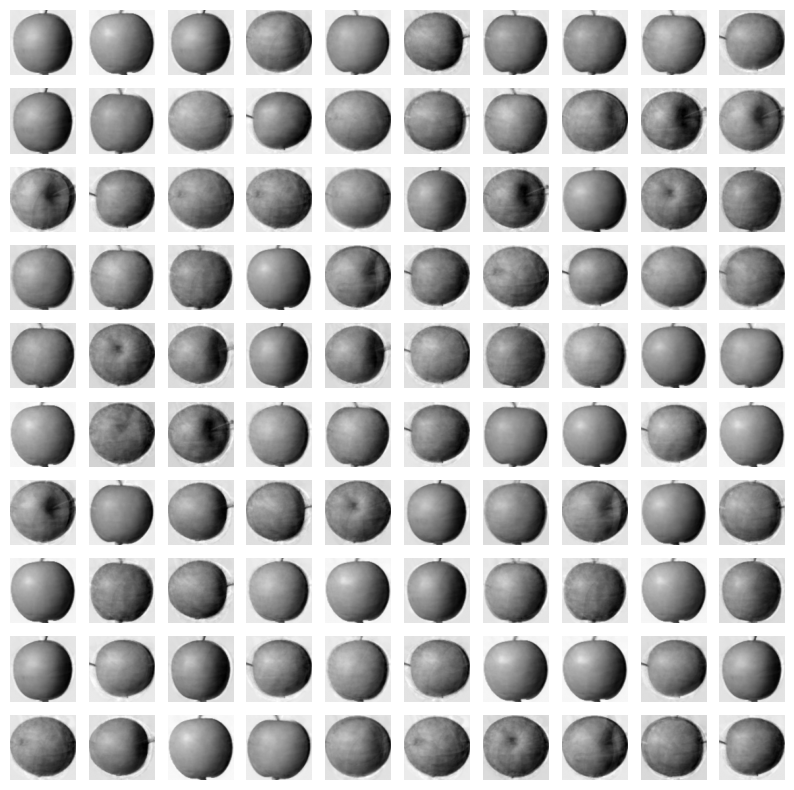

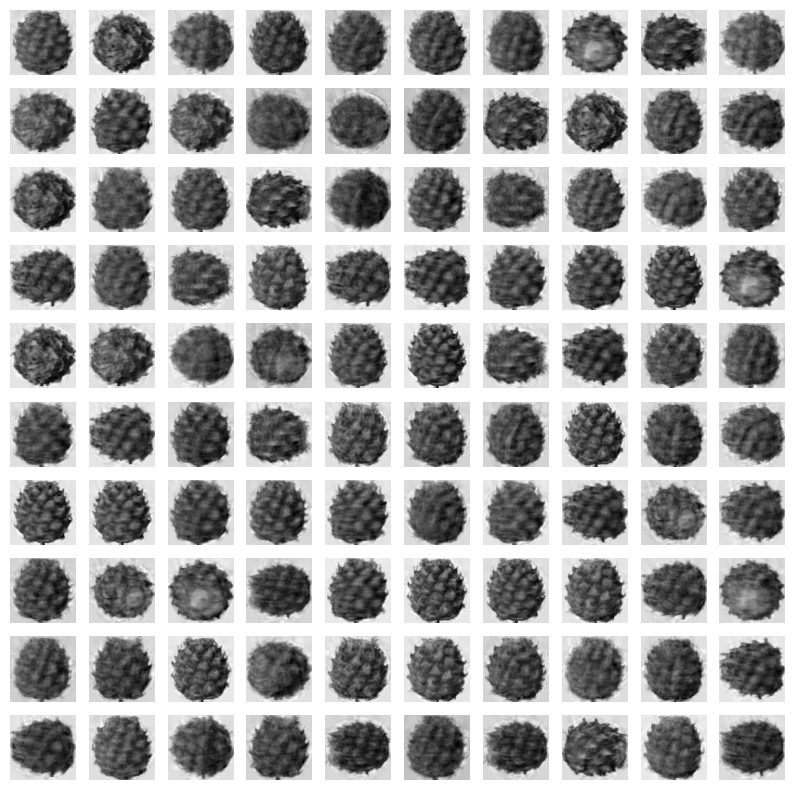

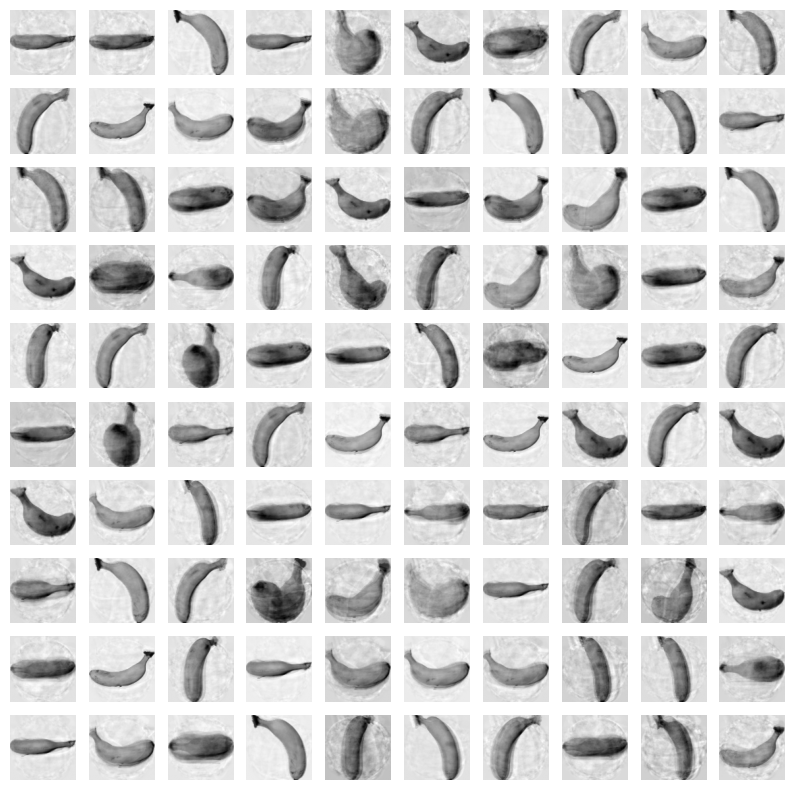

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('')

In [ ]:
# 대체로 잘 복원되었다
# 차원축소 과정에서 데이터 손실은 발생하기에, 입루 흐리고 번짐 있다.

# 50개의 특성으로 10000개의 특성을 표현

# 50개의 특성은 얼마나 분산을 잘 보존하고 있을까?

# 설명된 분산 explained_variance_ratio_

In [ ]:
# '설명된 분산' 이란
# => 원본데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 '설명된 분산' 비율이 기록되어 있다

In [ ]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486379, 0.00480347,
       0.00447836, 0.00437319, 0.00408037, 0.00389473, 0.00372441,
       0.00359265, 0.00331465, 0.00317795, 0.00304283, 0.00303737,
       0.00288886, 0.00275854, 0.0026481 , 0.00255371, 0.00251412,
       0.00247388, 0.00239084, 0.00230817, 0.00221615, 0.0021645 ,
       0.00213664, 0.0019599 , 0.00192786, 0.00188474, 0.00184357,
       0.00182767, 0.00172069, 0.00168083, 0.0016186 , 0.00160337])

In [ ]:
# [총 분산 비율]
# 이 분산비율을 모두 더하면 50개의 주성분으로 표현하고 있는 '총 분산 비율'을 얻을수 있다
print(np.sum(pca.explained_variance_ratio_))

0.921497456513478


## 적절한 주성분은 몇개?

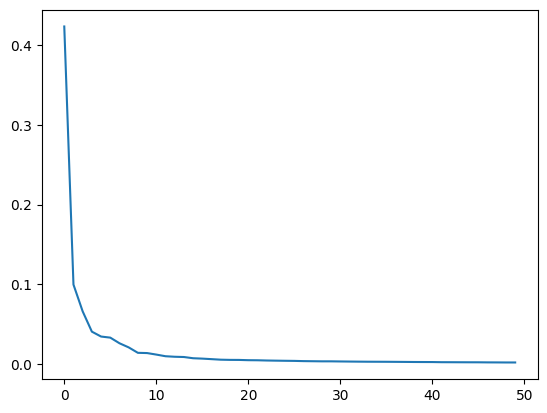

In [ ]:
# 설명된 분산을 시각화 하기
plt.plot(pca.explained_variance_ratio_)

In [ ]:
# ↑ 첫 10개의 주성분이 대부분의 분산을 표현하고 있다.
# 그 다음부터의 주성분이 설명하고 있는 분산은 비교적 작다.

# 차원축소결과 + 분류 알고리즘 함께 사용
- 원본데이터를 사용했을때와 얼마나 차이가 날까?

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
# 사과 0, 파인애플 1, 바나나 2 <- 타겟값 생성
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# 우선 원본 데이터 fruits_2d를 사용하여 성능 확인
scores = cross_validate(lr, fruits_2d, target)

In [ ]:
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))

0.9966666666666667 1.92459979057312


In [ ]:
# 차원 축소한 데이터 사용 : fruits_pca
scores = cross_validate(lr, fruits_pca, target)

In [ ]:
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))

0.9966666666666667 0.03068265914916992


In [ ]:
"""
0.9966666666666667 1.92459979057312    <- 원본
0.9966666666666667 0.03068265914916992 <- 차원축소 데이터
50개 특성만 사용.  정확도 거의 100%!   훈련시간이 매우 감소했다!
차원축소하면 저장공간 뿐 아니라, 모델 훈련속도도 향상시킬수 있다.
"""
None

# 설명된 분산의 비율

In [ ]:
# n_components= 에 '주성분의 개수' 대신  '원하는 설명된 분산의 비율' 을 입력할수도 있다
# PCA 는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.

# ↓ 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA생성해보자
pca = PCA(n_components=0.5) # 주성분 개수 대신 0~ 1 사이의 비율을 float로 입력하면 된다
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
# 몇개의 주성분을 찾았을까?
pca.n_components_

np.int64(2)

In [ ]:
# 위 모델로 원본 데이터 변환
fruits_pca = pca.transform(fruits_2d) #(300, 10000) -> (300,2)
fruits_pca.shape

(300, 2)

In [ ]:
# 2개까지 특성을 차원축소했는데? 교차검증 결과는?
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']), np.mean(scores['fit_time']))

0.9933333333333334 0.031146812438964843


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# 차원축소 결과 + 비지도 학습과 사용

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

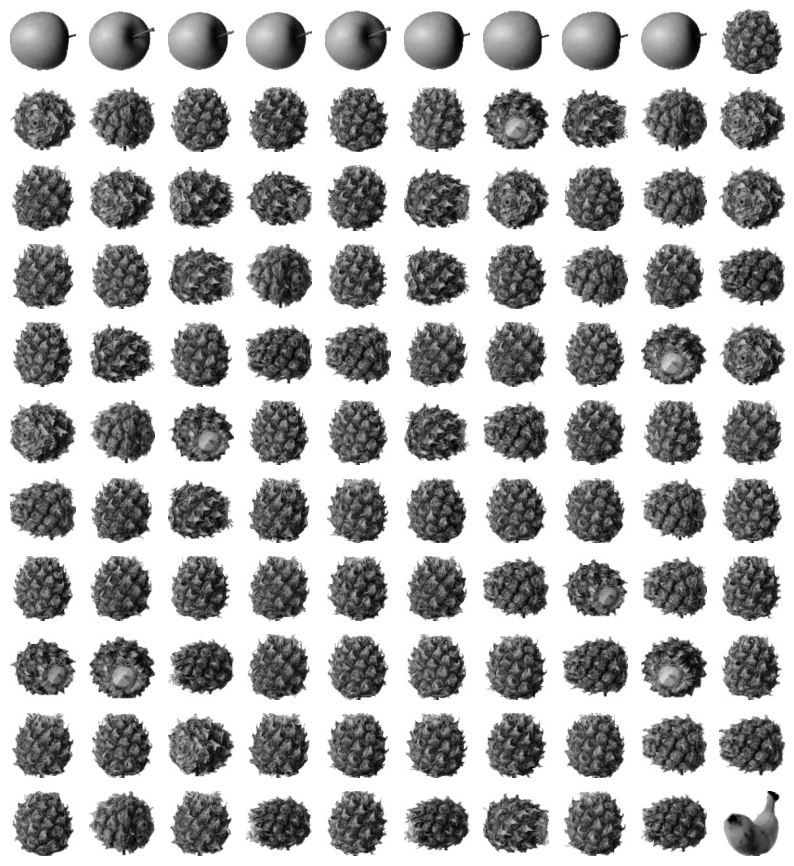

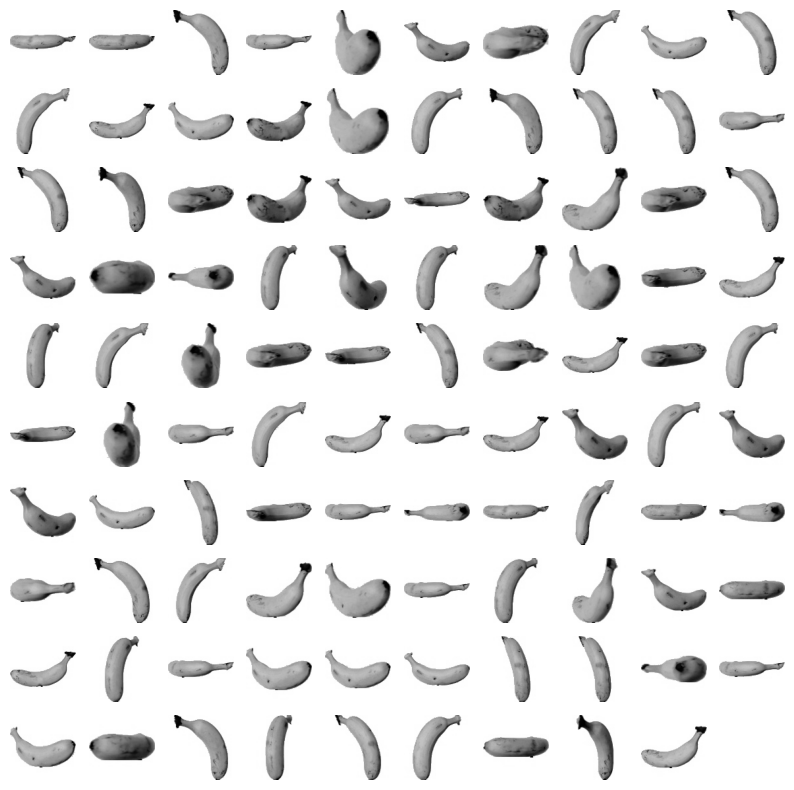

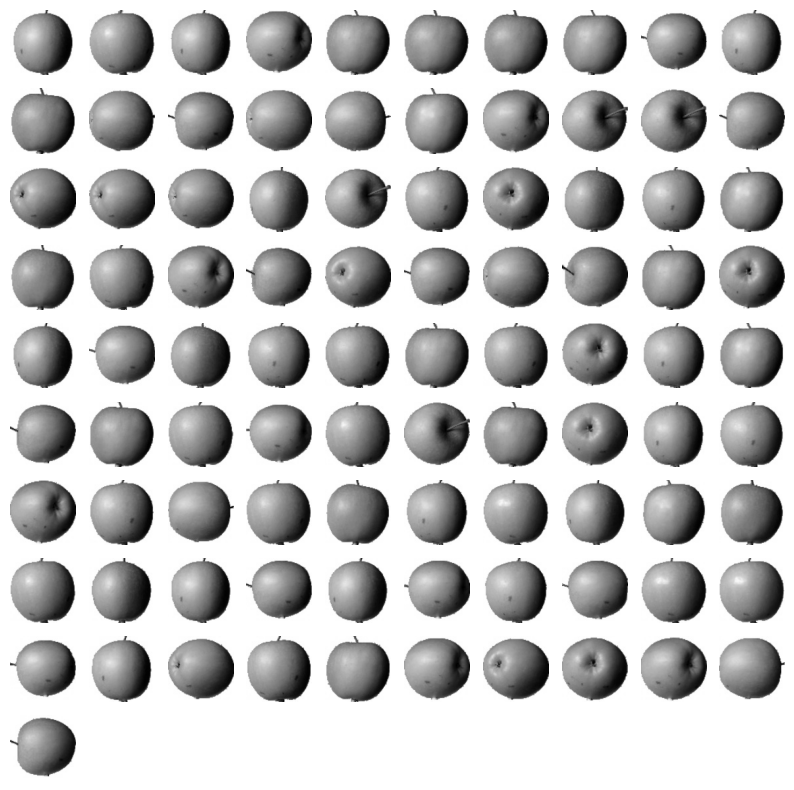

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print('')

In [ ]:
# 차원축소한 데이터로 군집한 결과도 원본데이터로 했을때와 큰 차이가 없다!

In [ ]:
# 훈련데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점! => 바로 시각화!
# 3개 이하로 차원을 줄이면 화면에 출력하기 쉽습니다.

In [ ]:
# fruits_pca는 2개의 특성 -> 2차원으로 표현 가능

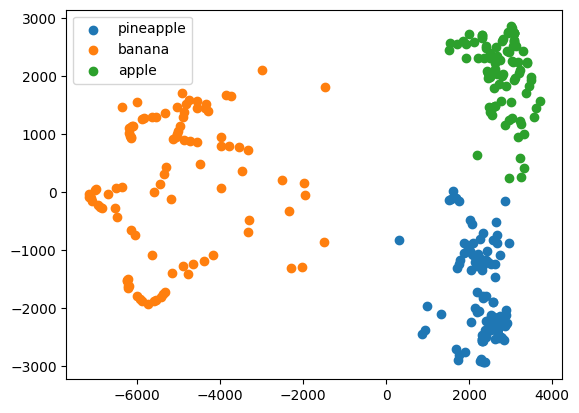

In [ ]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])

plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

# 문제 해결 과정 : 주성분 분석으로 차원 축소

1. 차원축소는 대표적인 비지도 학습 문제
  1. 차원축소를 사용하면 데이터셋의 크기 줄일수 있고, 시각화도 비교적 쉬워진다
  1. 차원축소된 데이터를 지도학습 혹은 비지도 학습 알고리즘에 재사용하여 성능을 높이거나 훈련속도를 향상 시킬수 있다

1. PCA 를 사용해 과일 사진 데이터의 특성을 50개로 줄임
  1. 특성 개수는 작아졌지만, 변환된 데이터는 원본데이터에 있는 분산의 90% 이상을 표현한다
  1. 이를 '설명된 분산' 이라 한다

1. PCA 는 자동으로 '설명된 분산' 을 계산하여 제공한다.
  1. 또한 주성분의 개수를 명시적으로 지정하는 대신 '설명된 분산' 의 비율을 설정하여 원하는 비율만큼 주성분을 찾을 수 있다.

1. PCA 는 변환된 데이터에서 원본데이터를 복원하는 메소드도 제공.  
  1. 변환된 데이터가 원본 데이터의 분산을 모두 유지하고 있지 않다면 완벽하게 복원되진 않는다.
  1. 하지만! 적은 특성으로도 상당 부분의 디테일을 복원할 수 있다.    
